Importing Libraries

In [147]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc

In [2]:
# reading the dataset
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):


- Loan_Status


We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

# EDA:Exploratory Data Analysis

In [3]:
# lets check the shape
df.shape

(614, 13)

our dataset has 614 rows and 13 columns which is many

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

ensuring that further there won't be half information shared

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.nunique().to_frame("Unique Values")

,Unique Values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


here,we can see Loan_ID has all the rows filled with unique values which will be of no use to us.

now we must check for null values, here is multiple missing values i can see

In [10]:
#Loan_ID has all it's value unique which may hinder our prediction
df.drop("Loan_ID", axis=1, inplace=True)

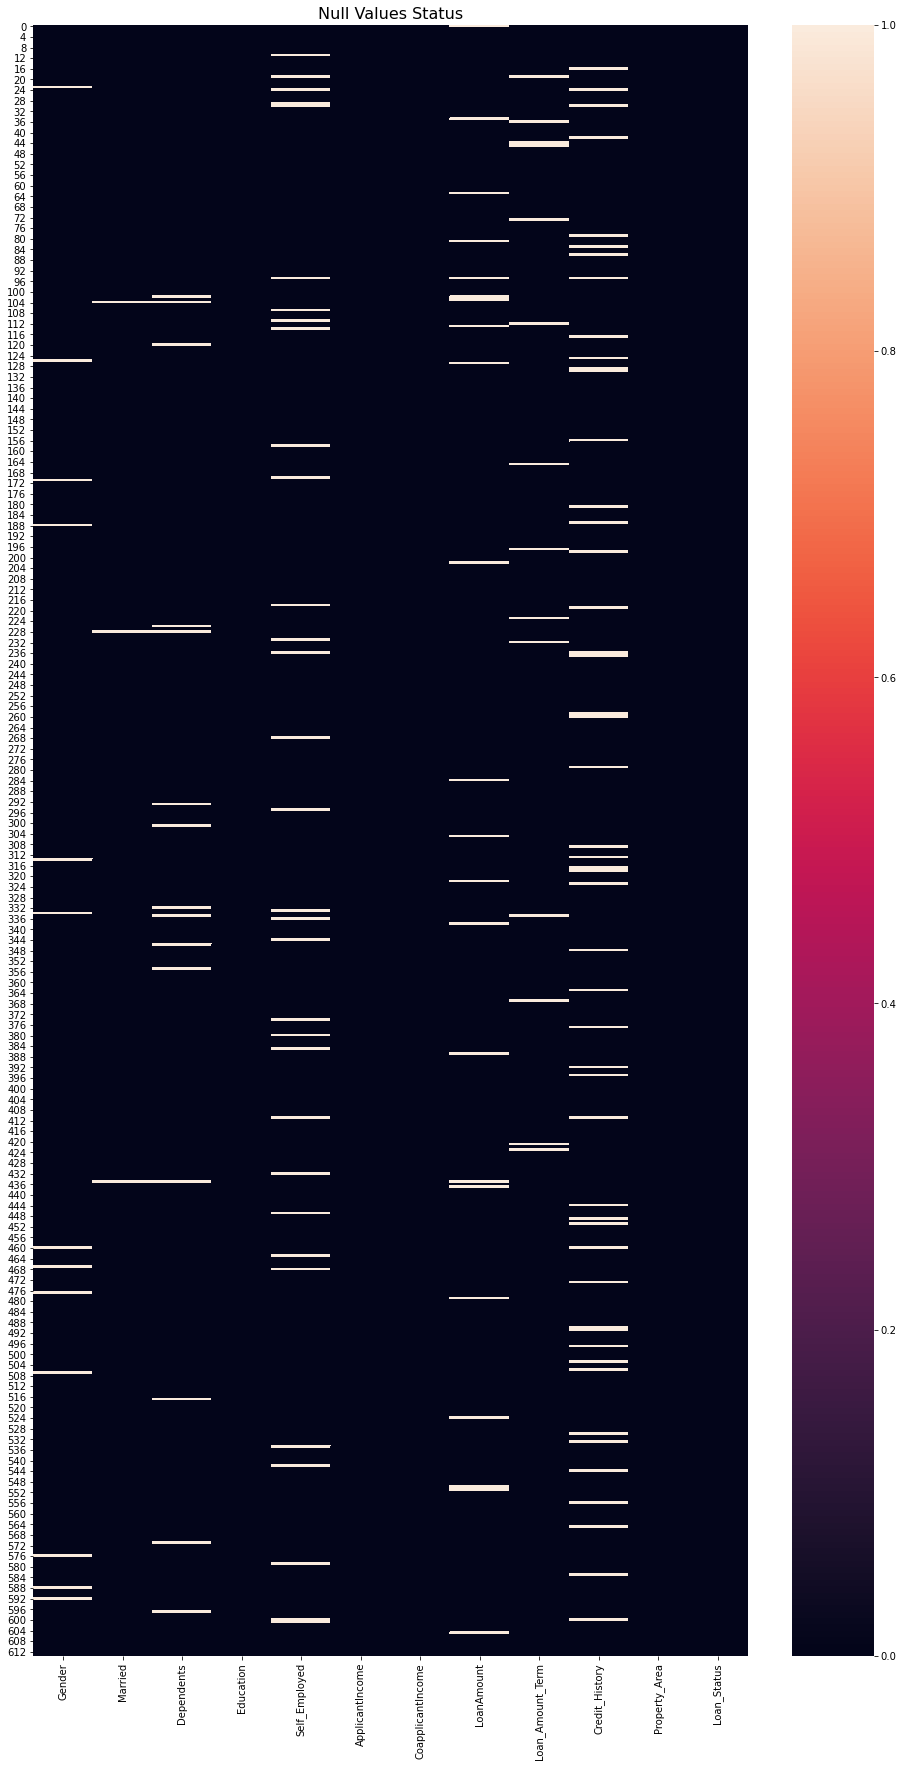

In [18]:
# ploting heatmapfor showing null values status
plt.figure(figsize=(16,30))
plt.title('Null Values Status',fontsize=16)
sns.heatmap(df.isnull());

In [19]:
# chechking null values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

there's not much but a lot of columns have missing values which is a thing of discussion, lets see what we can manage to fill or remove those values

In [20]:
# getting list of object data type column names
obj_dtype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        obj_dtype.append(x)

# getting the list of numerical data type column names
num_dtype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        num_dtype.append(x)

In [21]:
obj_dtype

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [22]:
num_dtype

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

- Mending the missing values

In [23]:
# filling numerical data columns with the mean value of that column
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())  

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [26]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240., 342., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [27]:
df['LoanAmount'].unique()

array([146.41216216, 128.        ,  66.        , 120.        ,
       141.        , 267.        ,  95.        , 158.        ,
       168.        , 349.        ,  70.        , 109.        ,
       200.        , 114.        ,  17.        , 125.        ,
       100.        ,  76.        , 133.        , 115.        ,
       104.        , 315.        , 116.        , 112.        ,
       151.        , 191.        , 122.        , 110.        ,
        35.        , 201.        ,  74.        , 106.        ,
       320.        , 144.        , 184.        ,  80.        ,
        47.        ,  75.        , 134.        ,  96.        ,
        88.        ,  44.        , 286.        ,  97.        ,
       135.        , 180.        ,  99.        , 165.        ,
       258.        , 126.        , 312.        , 136.        ,
       172.        ,  81.        , 187.        , 113.        ,
       176.        , 130.        , 111.        , 167.        ,
       265.        ,  50.        , 210.        , 175.  

covered with mean value

In [28]:
# filling categorical data with the mode value of respective column
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [29]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Alas! there isn't any null value remain

# Corelation plot

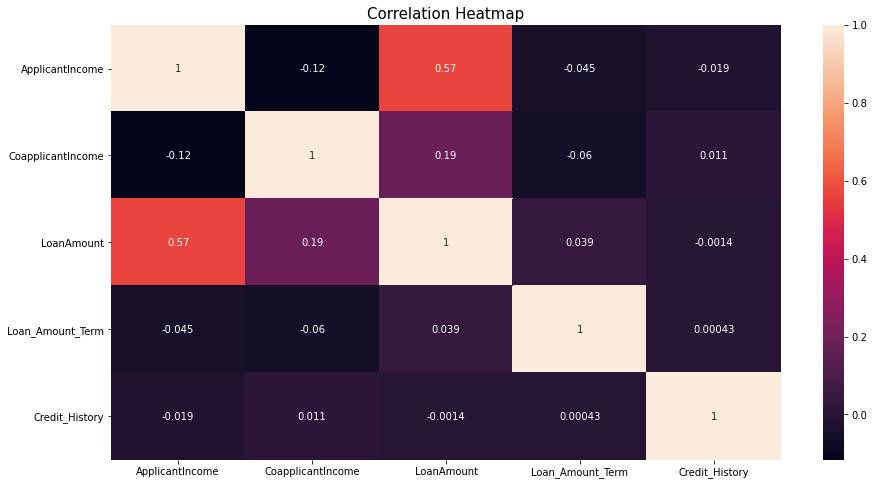

In [30]:
plt.figure(figsize=(15,8))
plt.title('Correlation Heatmap',fontsize=15)
sns.heatmap(df.corr(),annot=True);

- Our Loan amount is highly correlated with Applicant Income which is .57.

- Neither the strong positive nor the strong negative correlation present in any variable.

# Data Visualization

Data visualization of Object datatype

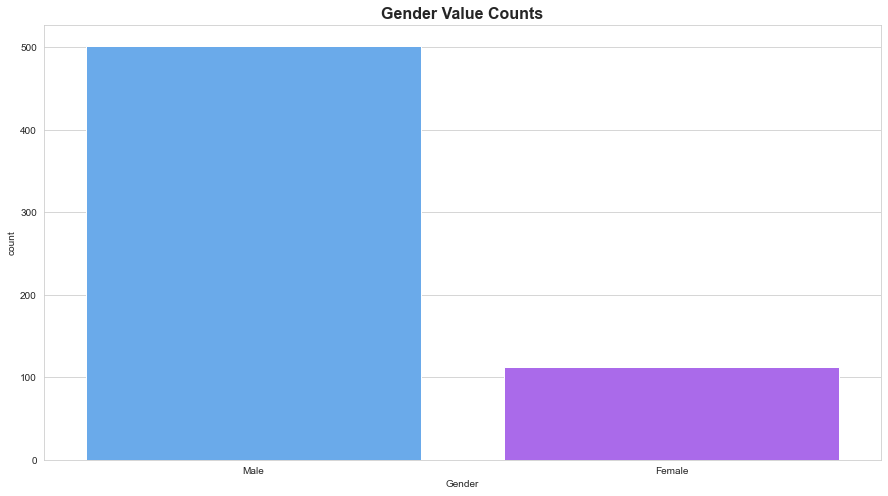

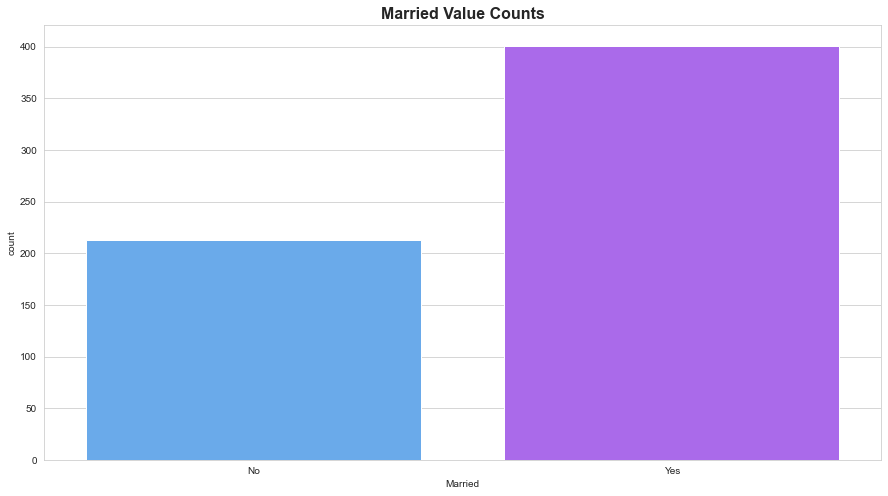

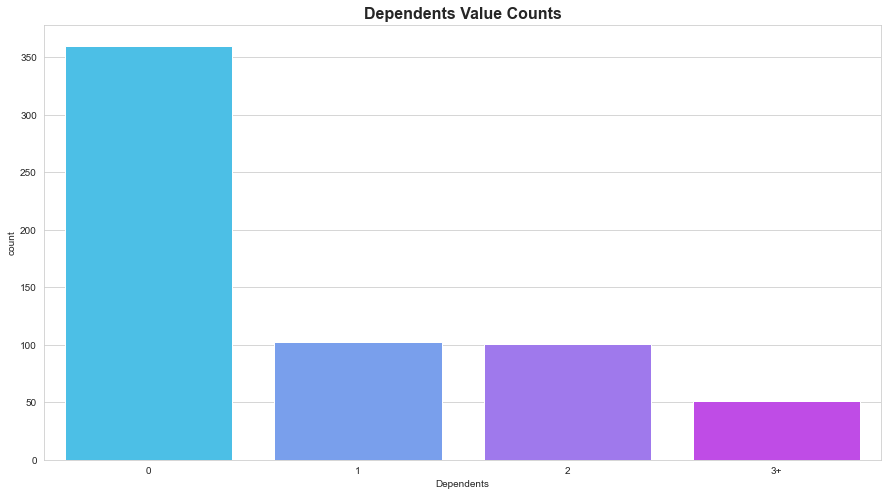

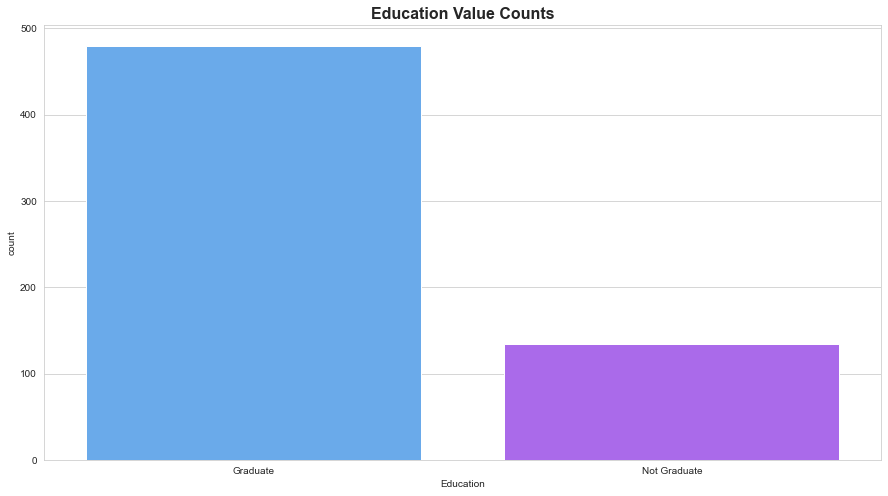

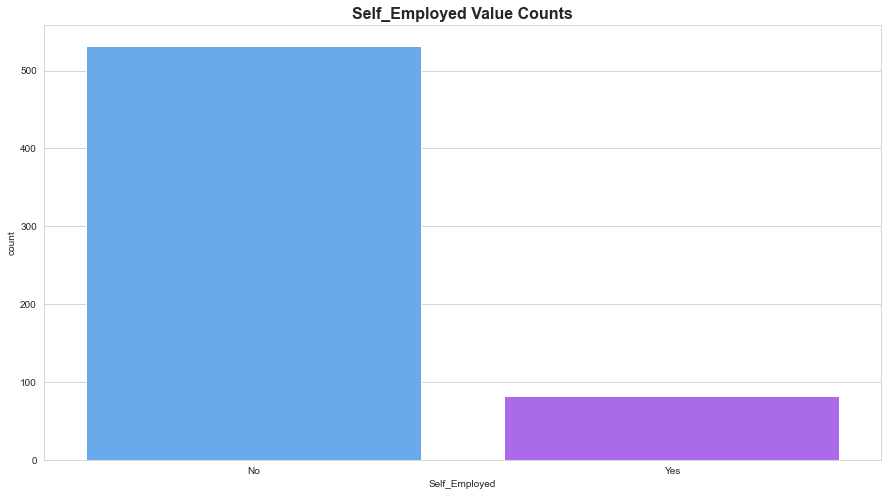

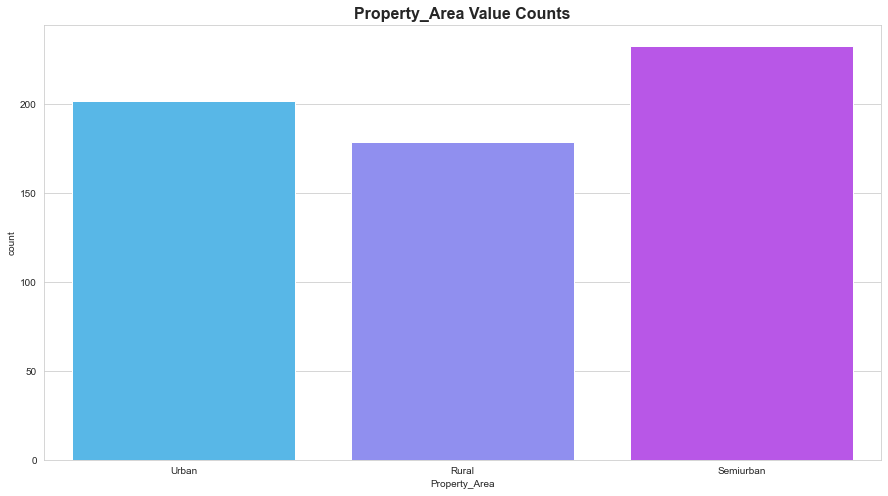

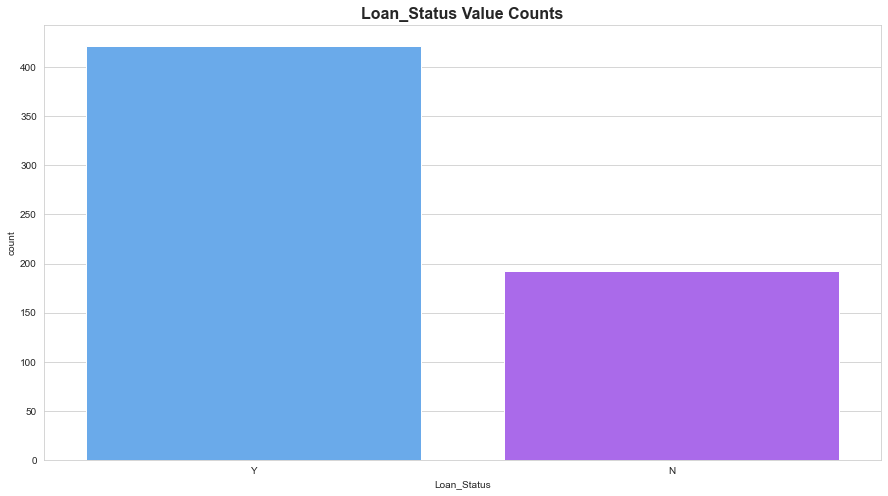

In [44]:
for col in obj_dtype:
    sns.set_style('whitegrid')
    plt.figure(figsize=(15,8))
    plt.title(col+' Value Counts',fontsize=16,fontname='sans-serif',fontweight='bold')
    x=sns.countplot(df[col],palette='cool',data=df)
    plt.show();

in gender value count males 5 times greater.

approx 50% of people are married.

Majority of people has no dependencies.

3 times the people of non graduates are graduates

majority of people are self employed

Majority of people are having property in semi urban places

loan status is not given to one third of the total count.

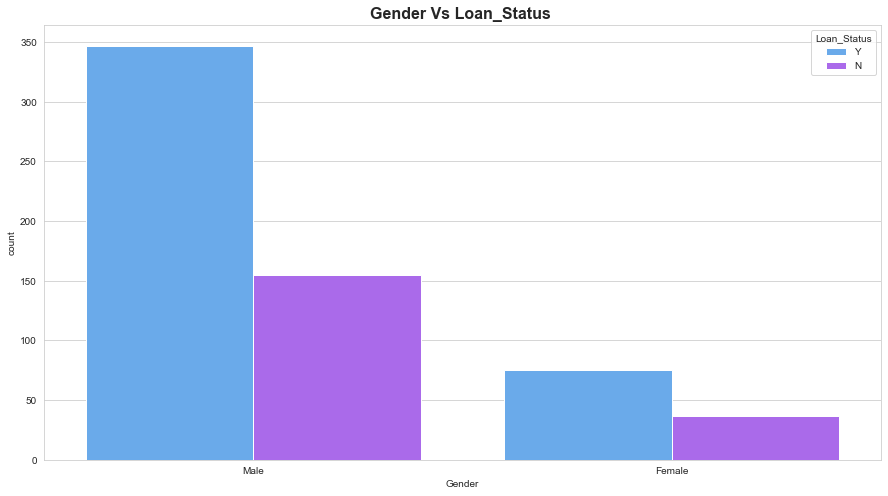

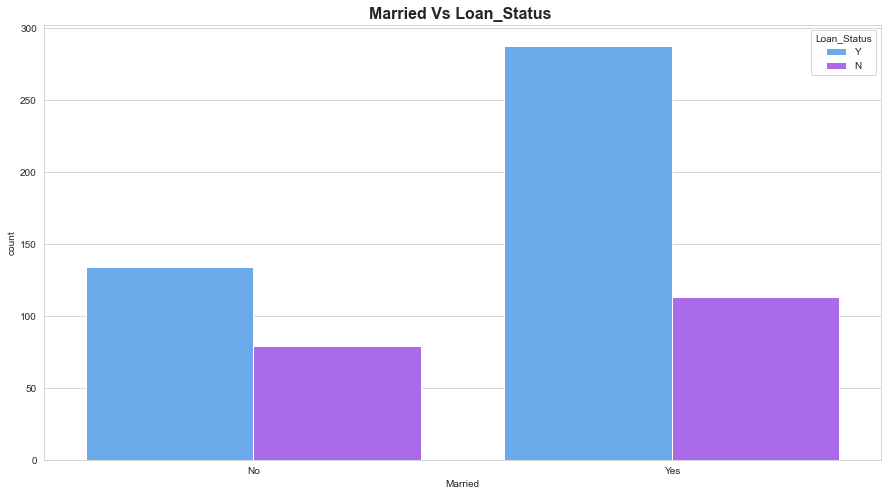

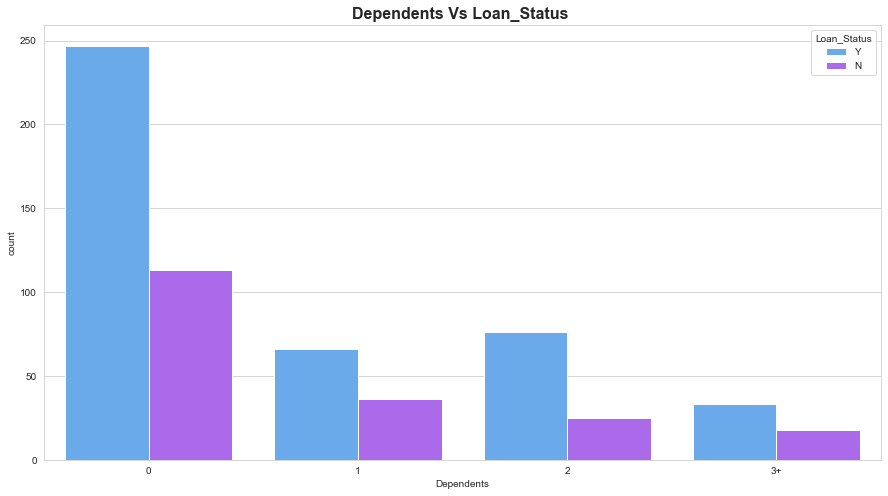

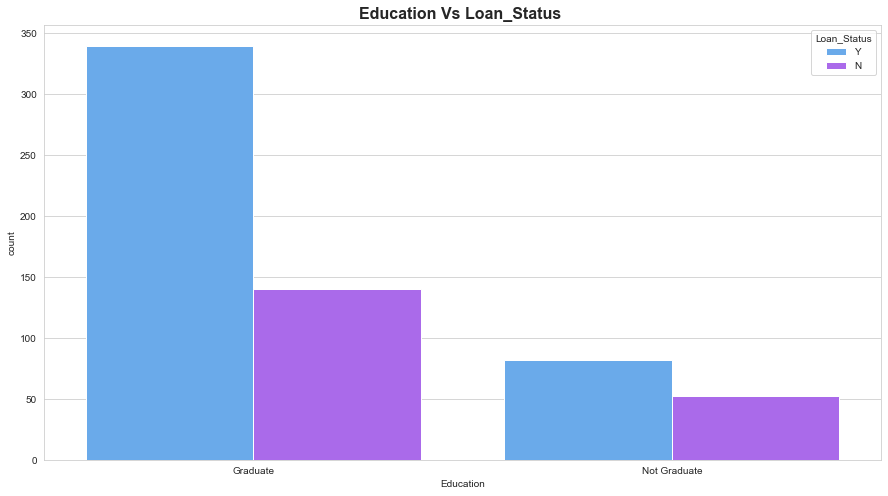

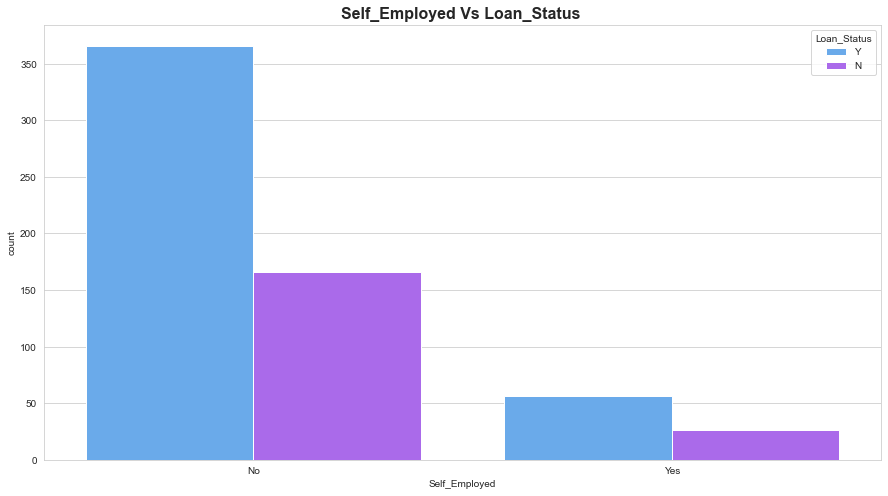

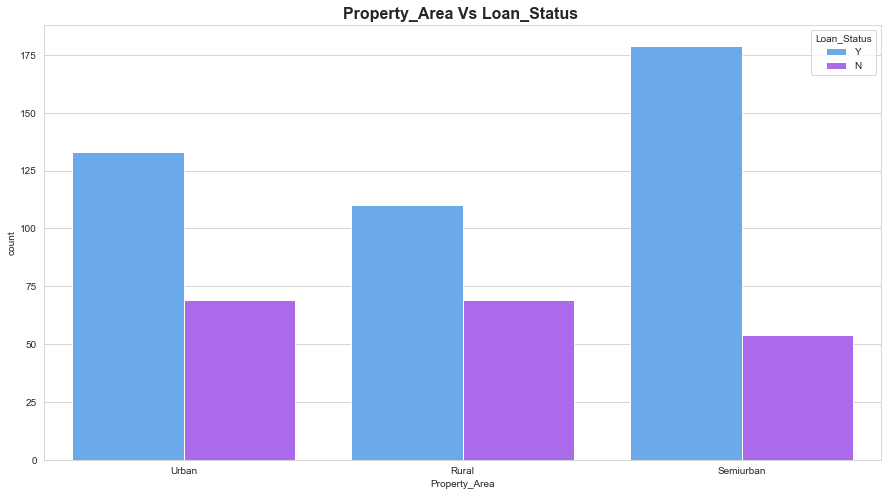

In [50]:
for col in obj_dtype[:-1]:
    sns.set_style('whitegrid')
    plt.figure(figsize=(15,8))
    plt.title(col+' Vs Loan_Status ',fontsize=16,fontname='sans-serif',fontweight='bold')
    x=sns.countplot(x=col,hue="Loan_Status",palette='cool',data=df)
    plt.show();

- Mostly Males sanctioned for loan as compaired to Females.
- Around 300 applicants are married whose loans are approved as compared to the applicants who are not married but their loans were approved
- Majority of the applicants whose loans are approved have no or 0 dependency & the minimun loan approved to those who has higher number of dependents.
- The count of graduates whose loans are approved is high as compared to the non graduates having approved loans.
- The percentage of self-employed applicants having approved loans is around 15% of the non self employed applicants having approved loans.
- People who has credit history 1 has the highest loan approval as compared to 0 credit history. People Who has zero credit score mostly they are denied to grant loan.
- The max. no. of applicants whose loans are approved belongs to or having property in semi-urban area.


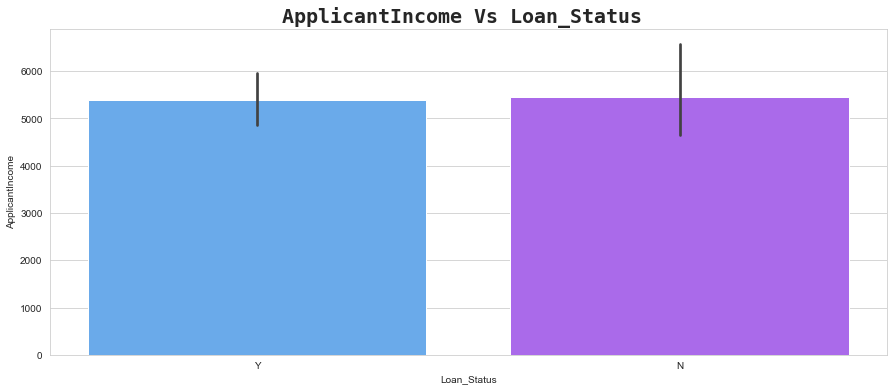

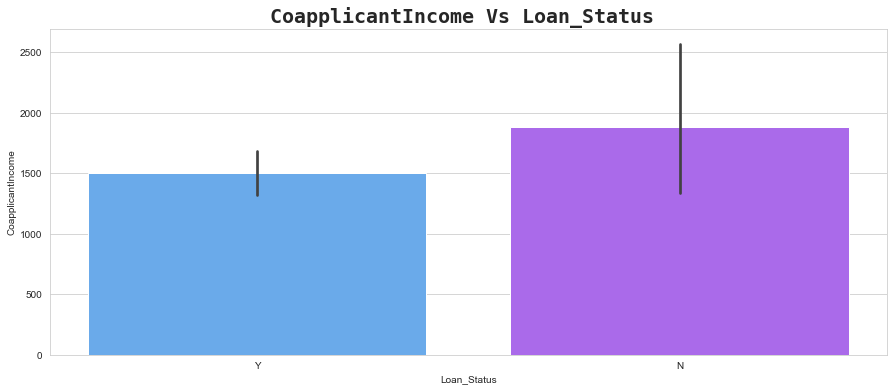

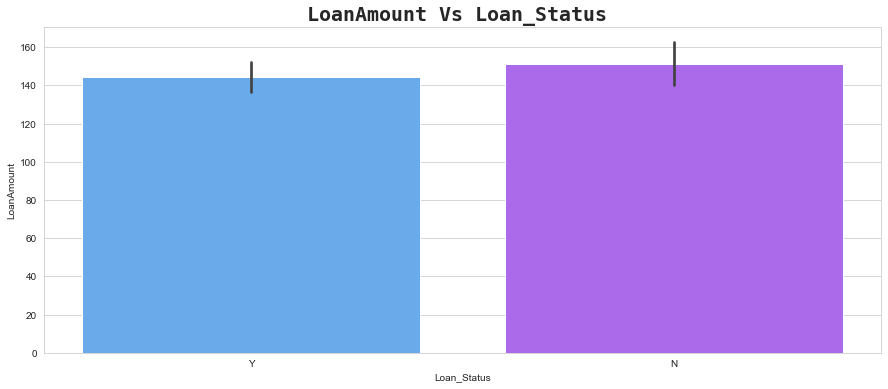

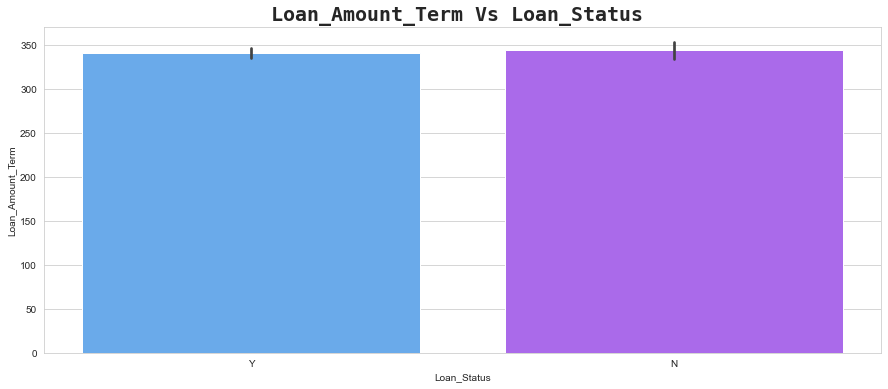

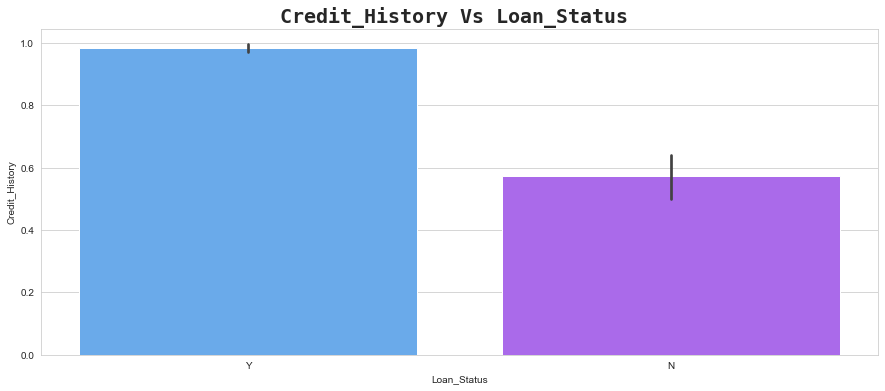

In [56]:
for col in num_dtype:
    plt.figure(figsize=(15,6))
    plt.title(col+' Vs Loan_Status ',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
    sns.barplot(y =df[col], x="Loan_Status",palette='cool' ,data = df)
    plt.plot()

- There is almost similar income of people who sanction loans/ denied. Applicant income has no significance to decide whether loan will approve or not.
- We can observe that, if co applicant income is higher than 1500, there are chances of denial to loan.
- There is almost similar trend regarding Loan Amount. There is no relation between Loan Amount and Loan Status.
- we can see that a person who has credit history one has highest loan approval rate

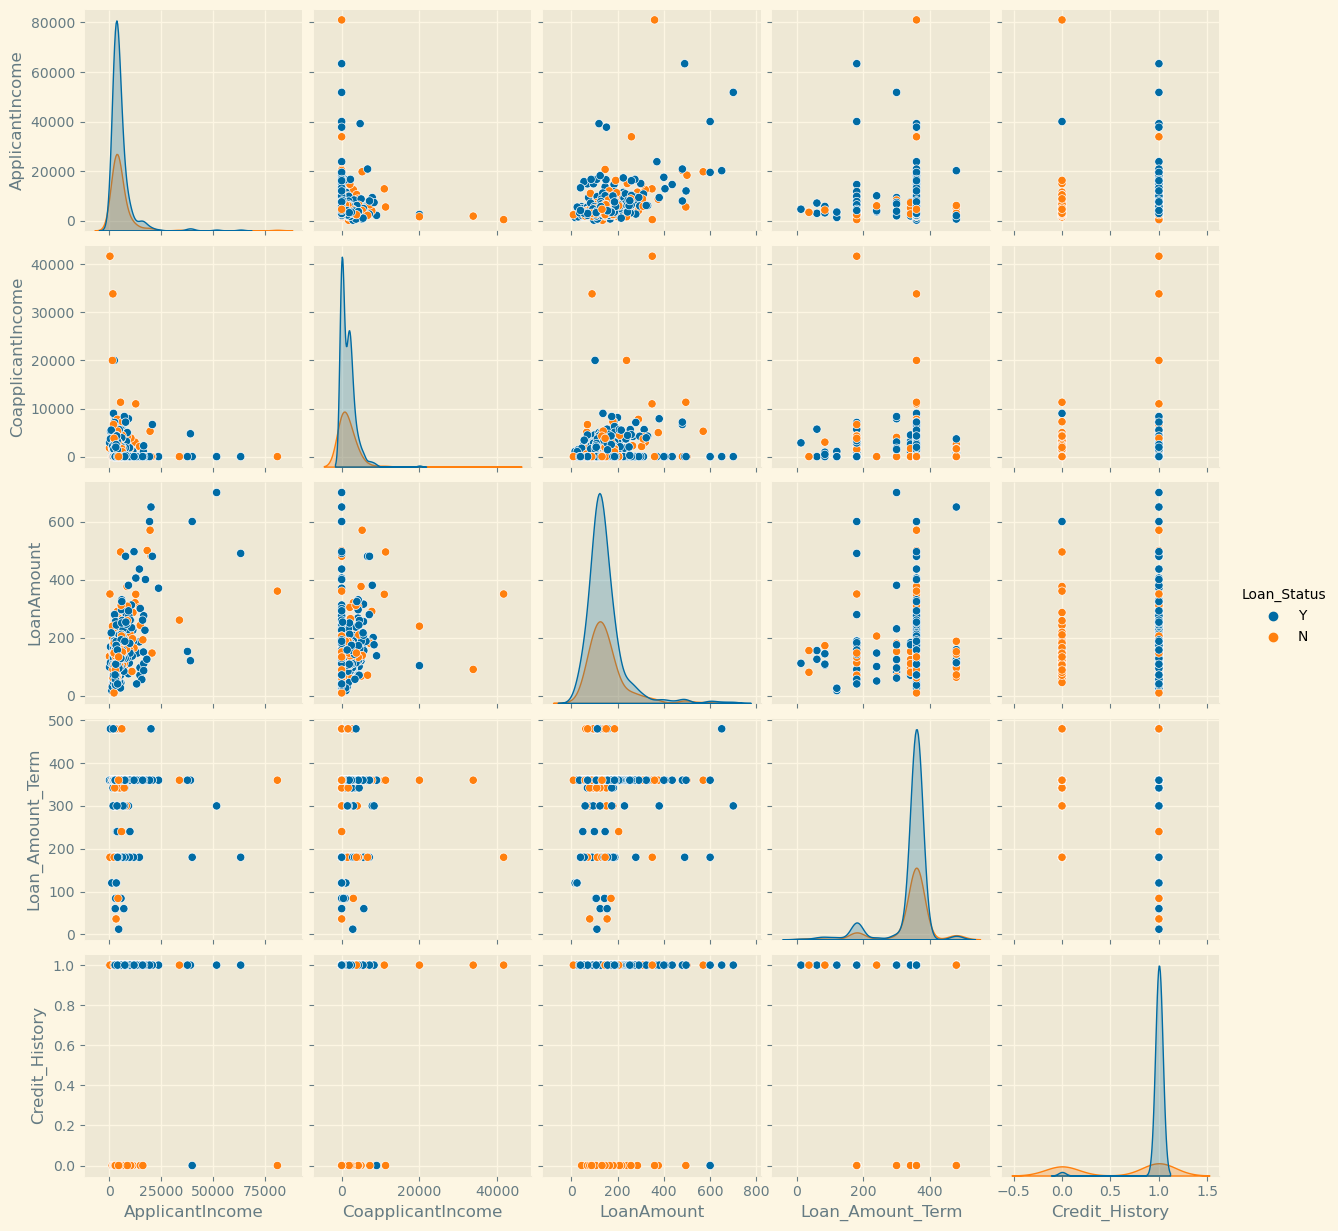

In [74]:
#generating pairplot

plt.style.use('tableau-colorblind10')
sns.pairplot(df, hue='Loan_Status')
plt.show()

A small summary of what we seen till now

It's continous data columns show us that the data points are distributed in each of the numeric datatype columns.

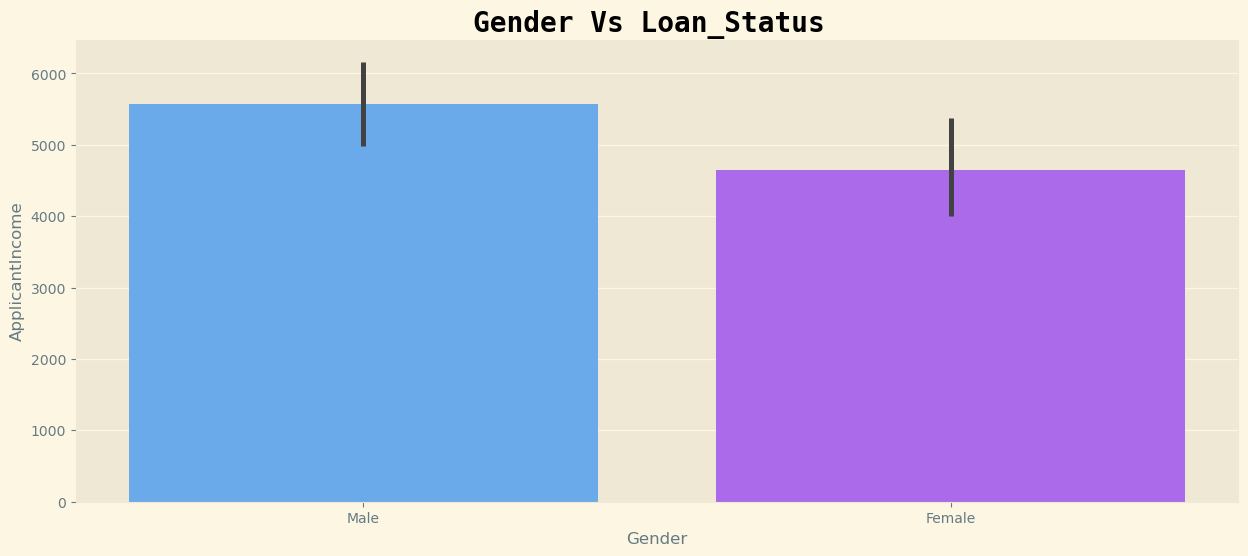

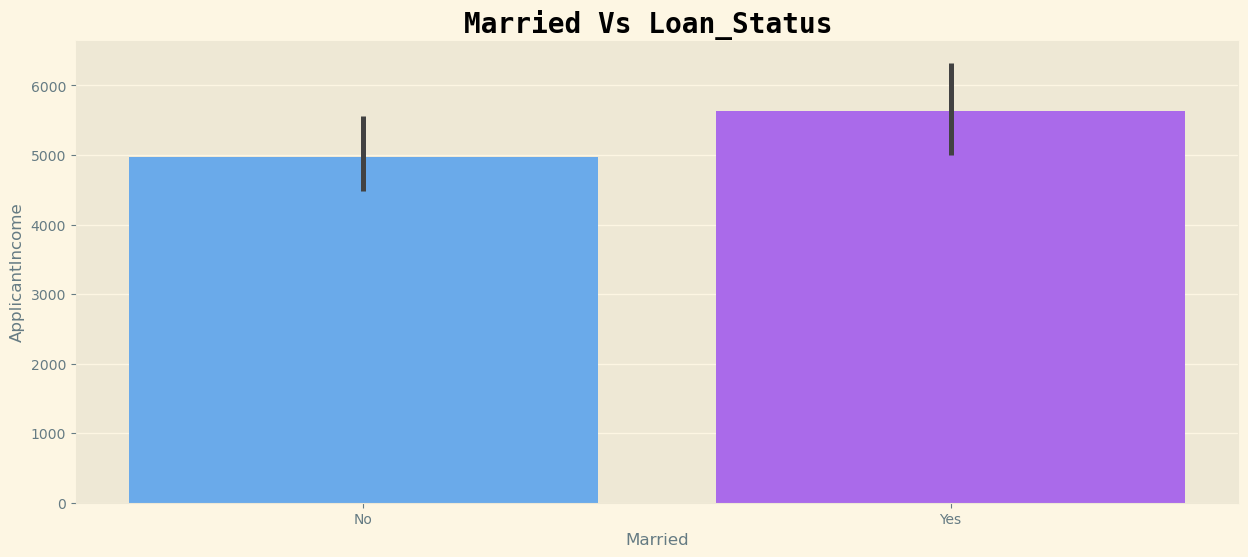

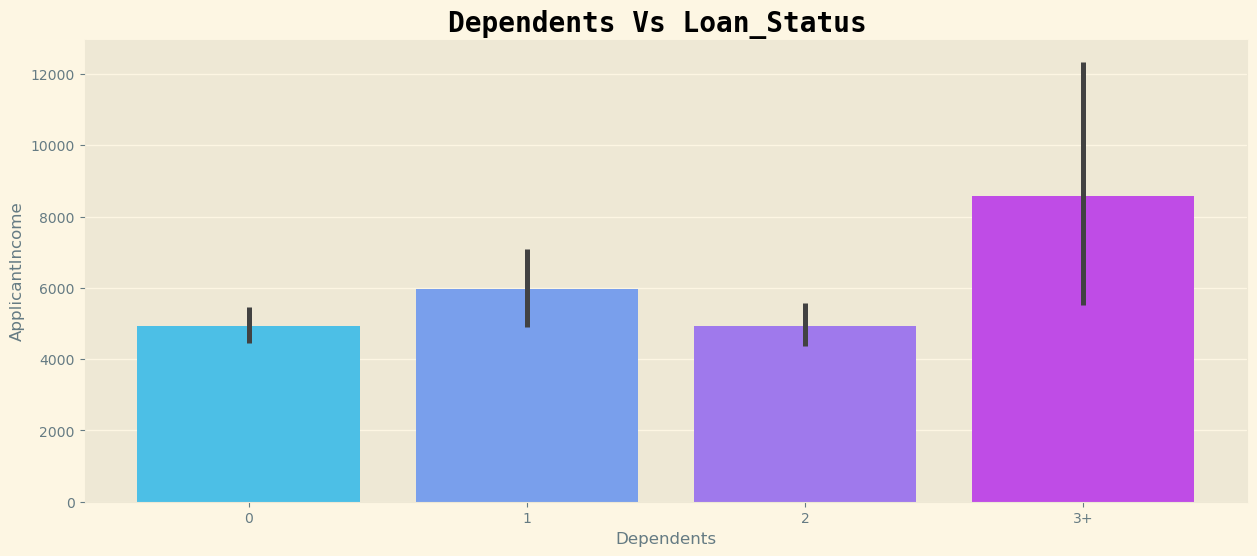

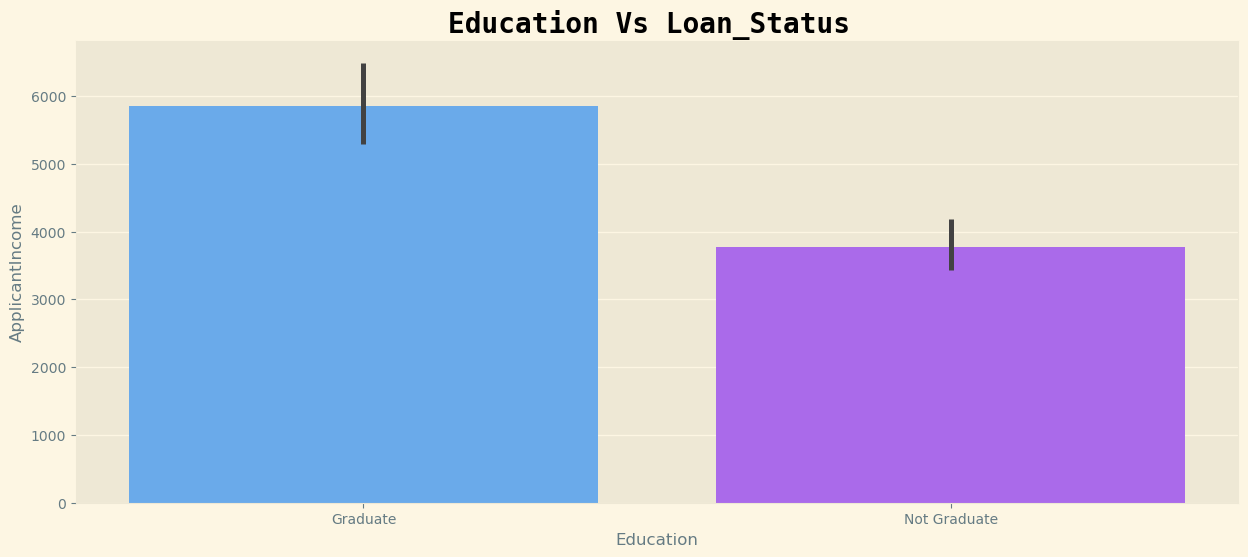

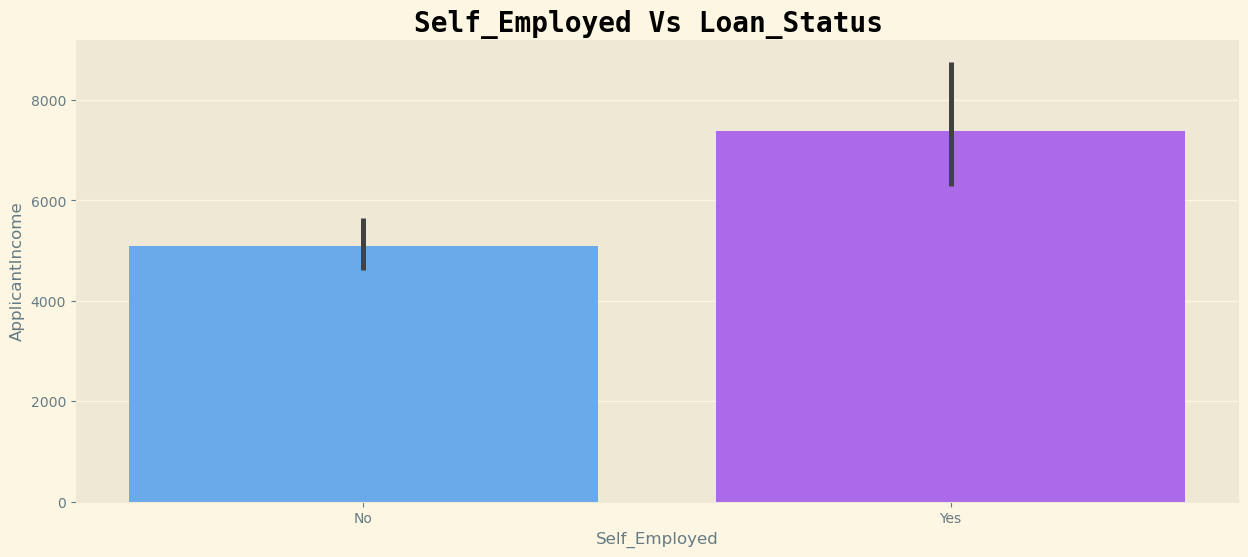

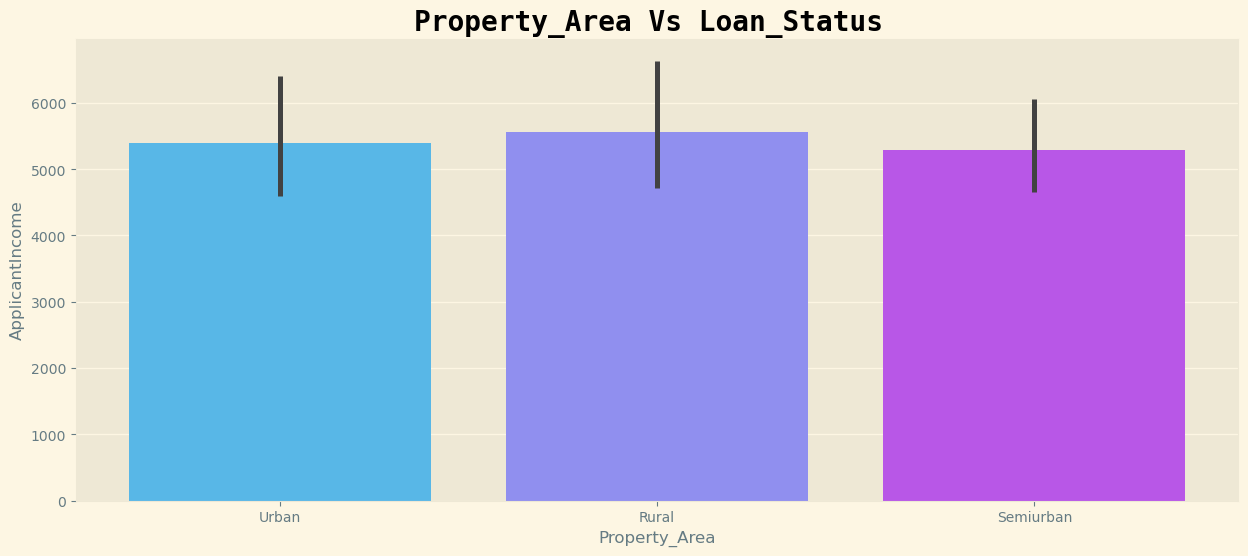

In [77]:
for col in obj_dtype[:-1]:
    plt.figure(figsize=(15,6))
    plt.title(col+' Vs Loan_Status ',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
    sns.barplot(x =df[col], y='ApplicantIncome',palette='cool' ,data = df)
    plt.plot()

the person who are self employed are earning well and their loan approval rate is also high as compared to non-self employed.

# Data Distribution

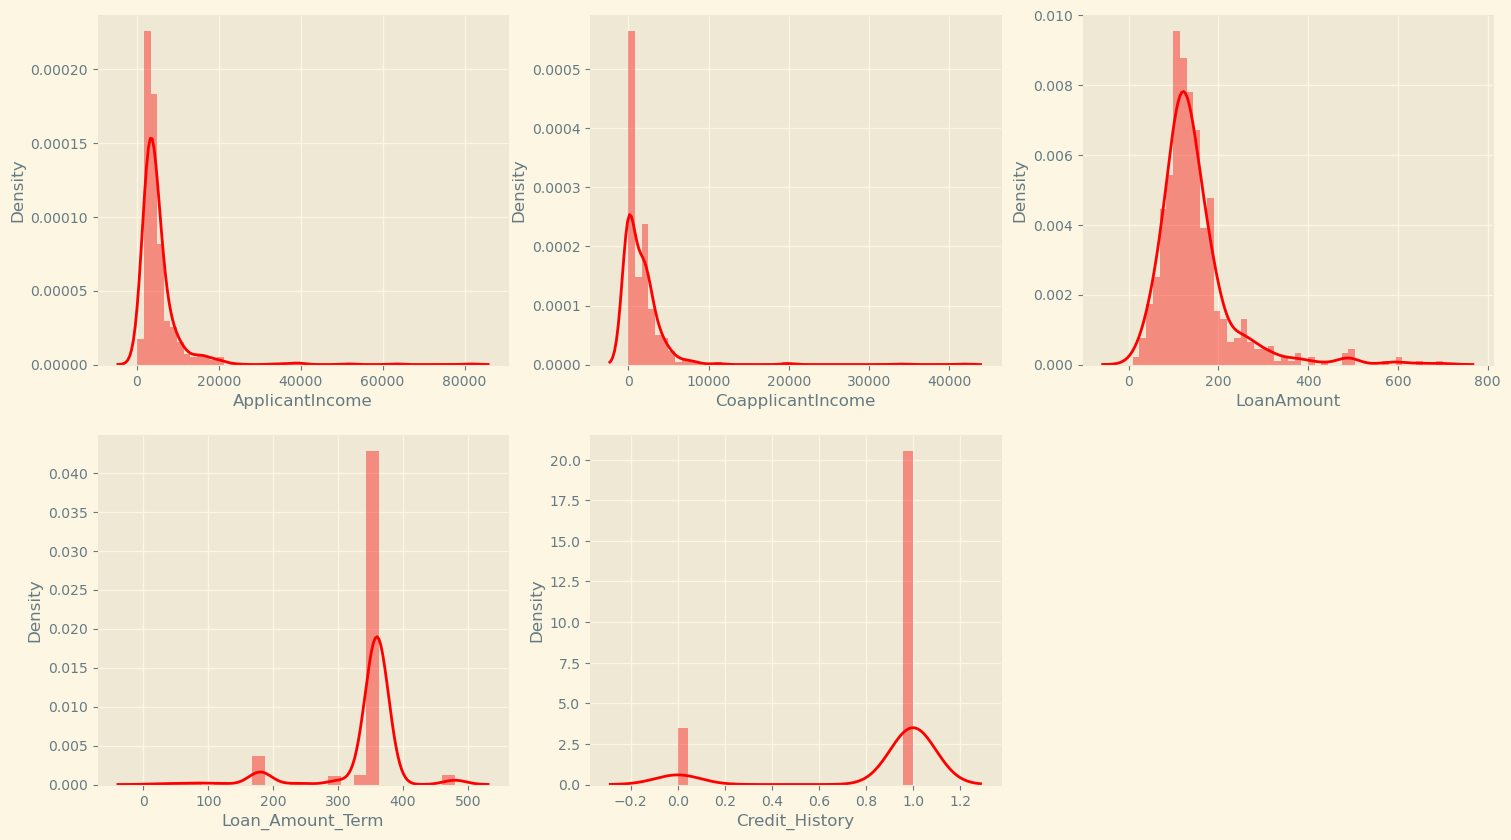

In [79]:
plt.figure(figsize=(18,10))
plot=1
for col in num_dtype:
    if plot<=6:
        plt.subplot(2,3,plot)
        sns.distplot(df[col],color='red')
        plt.xlabel(col)
        plot=plot+1
plt.show();

1-We could see that applicants income, Co-applicants income, Laon Amount are right skewed.

2- Laon Amount Term has majority values of 360 months.

3- Credit history has only two values (0 or ). In which majority values are One.

# Outliers Detection

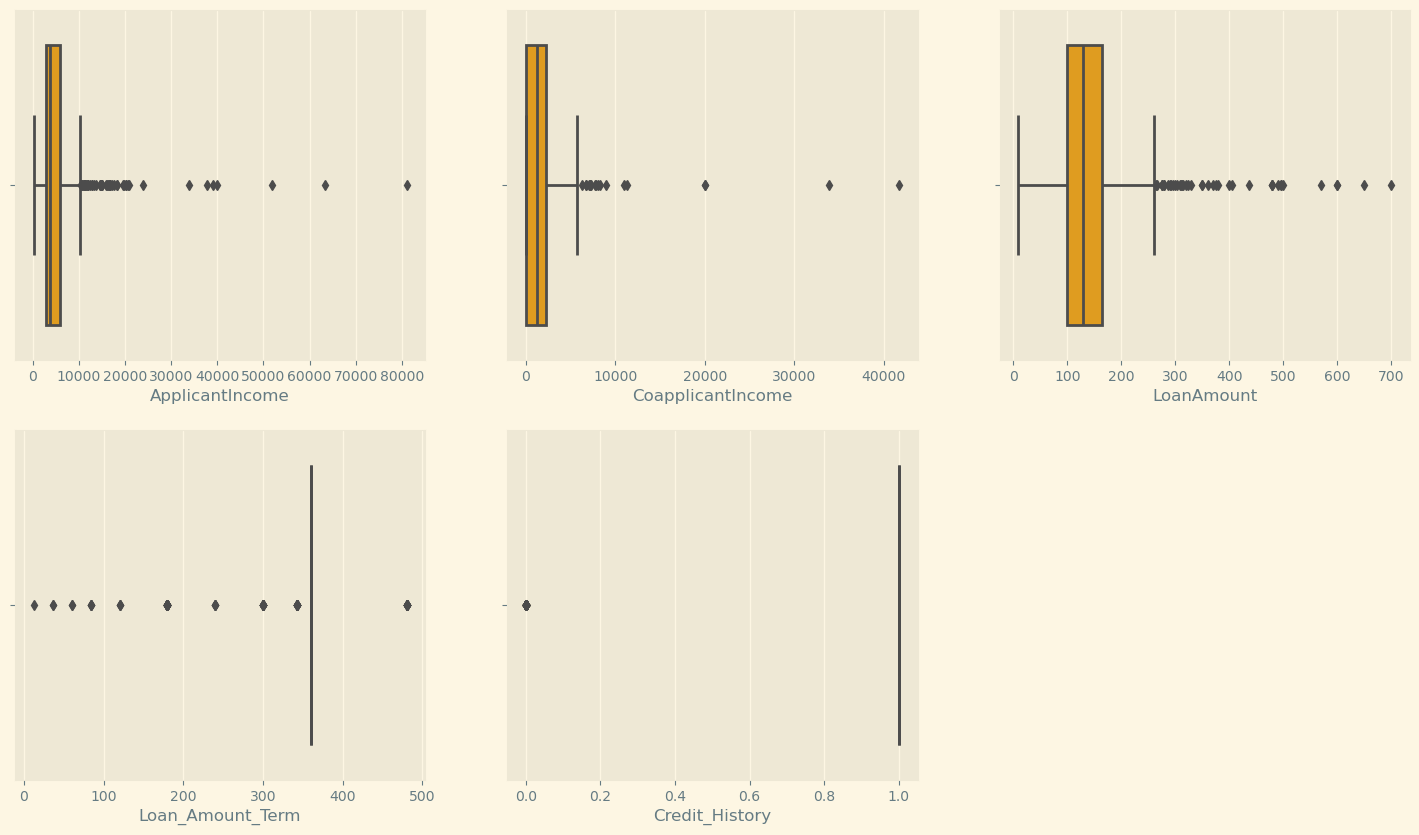

In [81]:
plt.figure(figsize=(18,10))
plot=1
for col in num_dtype:
    if plot<=6:
        plt.subplot(2,3,plot)
        sns.boxplot(df[col],color='orange')
        plt.xlabel(col)
        plot=plot+1
plt.show();

Outliers are present in Appilcants Income, Coapplicants Income and Loan Amounts.

# Fixing Outliers

In [82]:
# when data is normally distributed.
def fixing_outlier(df,col):
    IQR=df[col].quantile(.75)-df[col].quantile(.25)
    lower_limit=df[col].quantile(.25)-(1.5*IQR)
    upper_limit=df[col].quantile(.75)+(1.5*IQR)
    non_outlier=np.where((df[col]<lower_limit )|(df[col]>upper_limit),df[col].median(),df[col])
    df[col]=non_outlier
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.subplot(1,2,2)
    sns.boxplot(df[col])

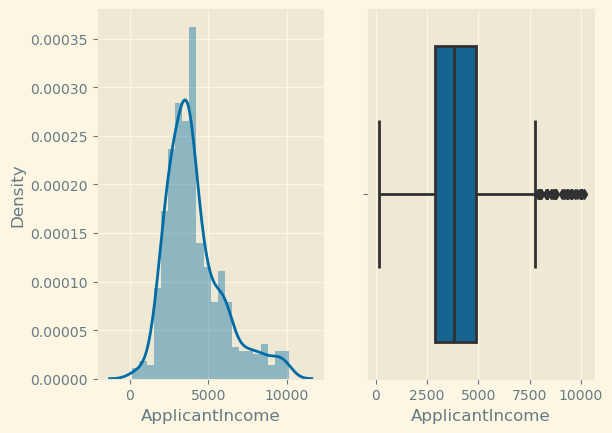

In [83]:
fixing_outlier(df,'ApplicantIncome')

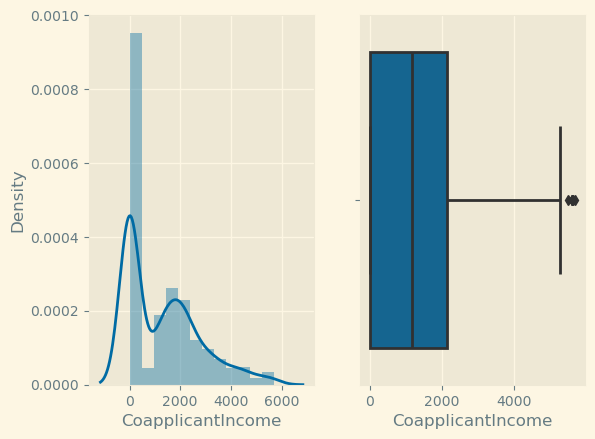

In [84]:
fixing_outlier(df,'CoapplicantIncome')

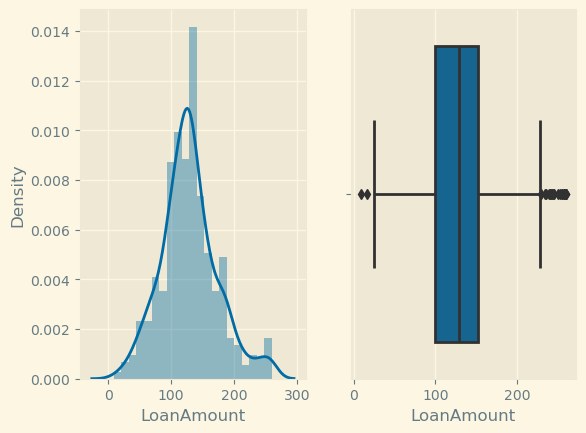

In [85]:
fixing_outlier(df,'LoanAmount')

sucesfully replace our outliers from Applicant income,Co applicant Income & Loan Amount.

# Using Log Transform to fix skewness

In [88]:
for col in num_dtype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

I have applied Log Transformation on our numerical datatype columns to ensure that we do not have skewness in our dataset.

# Skewness Time

In [89]:
df.skew()

ApplicantIncome     -1.040574
CoapplicantIncome   -0.187949
LoanAmount           0.447869
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
dtype: float64

# Label Encoding

In [95]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in obj_dtype:
    df[col]=le.fit_transform(df[col])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674197,0.000000,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,8.430327,7.319202,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,8.006701,0.000000,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,7.857094,7.765993,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,8.699681,0.000000,141.000000,360.0,1.0,2,1


# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [96]:
X = df.drop('Loan_Status', axis=1)
Y = df['Loan_Status']

# Feature Scaling

In [98]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_scaled=s.fit_transform(X)
X=pd.DataFrame(x_scaled,columns=X.columns)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.970059,-1.110246,0.383961,0.279851,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.450675,0.812342,-0.026236,0.279851,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.451548,-1.110246,-1.407507,0.279851,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.770175,0.929704,-0.204465,0.279851,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,1.024334,-1.110246,0.263385,0.279851,0.411733,1.223298
5,0.472343,0.728816,1.244745,-0.528362,2.547117,0.806674,1.081041,-0.003957,0.279851,0.411733,1.223298
6,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.986889,0.813731,-0.761429,0.279851,0.411733,1.223298
7,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.426152,0.945478,0.642121,0.279851,-2.428760,-0.047607
8,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.164160,0.815457,0.864907,0.279851,0.411733,1.223298
9,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.058746,0.749847,-0.003957,0.279851,0.411733,-0.047607


In [99]:
Y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [100]:
# adding samples to make all the categorical label values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [101]:
Y.value_counts()

0    422
1    422
Name: Loan_Status, dtype: int64

# Feature Scaling

In [102]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.492526,-1.342385,-0.762433,-0.538357,-0.389277,1.031408,-1.115948,0.417447,0.272727,0.557074,1.210948
1,0.492526,0.761082,0.244528,-0.538357,-0.389277,0.481194,0.832564,-0.020501,0.272727,0.557074,-1.334513
2,0.492526,0.761082,-0.762433,-0.538357,2.613738,-0.474583,-1.115948,-1.495219,0.272727,0.557074,1.210948
3,0.492526,0.761082,-0.762433,1.902178,-0.389277,-0.812123,0.951508,-0.210787,0.272727,0.557074,1.210948
4,0.492526,-1.342385,-0.762433,-0.538357,-0.389277,1.088905,-1.115948,0.288715,0.272727,0.557074,1.210948


# Building model

In [127]:
def model_run(clf,X,Y):
    max_accuracy=0
    for i in range(42,100):
        X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=.20,random_state=i,stratify=Y)
        #x_train,y_train=SMOTE().fit_resample(x_train,y_train) ##over sampling of our Data
        clf.fit(X_train,Y_train)
        pred=clf.predict(X_test)
        accuracy_check=accuracy_score(Y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,X,Y,scoring='accuracy').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,X,Y,scoring='accuracy').std()*100)
    print('\n')
    print('F1 score',f1_score(Y_test,pred)*100)
    print('\n')
    print('Training accuracy',clf.score(X_train,Y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(X_test,Y_test)*100)
    print('\n')
    print('Confusion Matrix',confusion_matrix(Y_test,pred))
    print('\n')
    print('Classification Report',classification_report(Y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(Y_test,pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

max accuracy score corresponding to 94 is 76.33136094674556


cross validation score 70.7318963088194


Standard Deviation 2.7697244382813193


F1 score 76.38190954773869


Training accuracy 73.18518518518519


Test Accuracy 72.18934911242604


Confusion Matrix [[46 38]
 [ 9 76]]


Classification Report               precision    recall  f1-score   support

           0       0.84      0.55      0.66        84
           1       0.67      0.89      0.76        85

    accuracy                           0.72       169
   macro avg       0.75      0.72      0.71       169
weighted avg       0.75      0.72      0.71       169



Roc_auc Score 0.7208683473389357





94

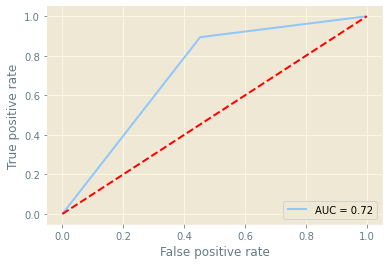

In [112]:
#Logistic Regression
lg=LogisticRegression()
model_run(lg,X,Y)

#5.6

max accuracy score corresponding to 53 is 82.24852071005917


cross validation score 74.64215271907581


Standard Deviation 4.334959848973057


F1 score 73.93939393939394


Training accuracy 100.0


Test Accuracy 74.55621301775149


Confusion Matrix [[65 19]
 [24 61]]


Classification Report               precision    recall  f1-score   support

           0       0.73      0.77      0.75        84
           1       0.76      0.72      0.74        85

    accuracy                           0.75       169
   macro avg       0.75      0.75      0.75       169
weighted avg       0.75      0.75      0.75       169



Roc_auc Score 0.7457282913165267





53

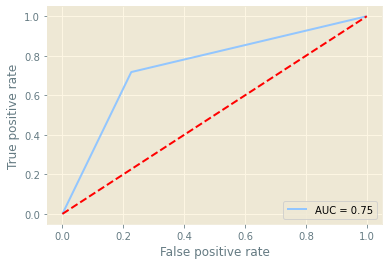

In [113]:
#Decision Tree
dt = DecisionTreeClassifier()
model_run(dt,X,Y)

#7.6

max accuracy score corresponding to 62 is 79.28994082840237


cross validation score 73.81586362355594


Standard Deviation 2.1536855974809597


F1 score 66.66666666666667


Training accuracy 85.33333333333334


Test Accuracy 69.23076923076923


Confusion Matrix [[65 19]
 [33 52]]


Classification Report               precision    recall  f1-score   support

           0       0.66      0.77      0.71        84
           1       0.73      0.61      0.67        85

    accuracy                           0.69       169
   macro avg       0.70      0.69      0.69       169
weighted avg       0.70      0.69      0.69       169



Roc_auc Score 0.6927871148459384





62

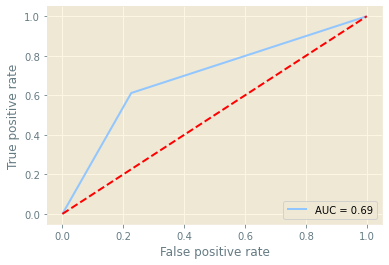

In [114]:
#KNN
knn = KNeighborsClassifier()
model_run(knn,X,Y)

#5.47

max accuracy score corresponding to 94 is 76.33136094674556


cross validation score 72.03860242321781


Standard Deviation 2.5132655921400935


F1 score 78.67298578199052


Training accuracy 71.70370370370371


Test Accuracy 73.37278106508876


Confusion Matrix [[41 43]
 [ 2 83]]


Classification Report               precision    recall  f1-score   support

           0       0.95      0.49      0.65        84
           1       0.66      0.98      0.79        85

    accuracy                           0.73       169
   macro avg       0.81      0.73      0.72       169
weighted avg       0.81      0.73      0.72       169



Roc_auc Score 0.7322829131652662





94

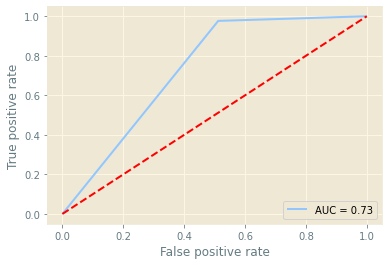

In [117]:
#Naive Bayes
gnb = GaussianNB()
model_run(gnb,X,Y)

#4.3

max accuracy score corresponding to 42 is 88.75739644970415


cross validation score 82.59157509157508


Standard Deviation 6.353277867133357


F1 score 79.31034482758619


Training accuracy 100.0


Test Accuracy 78.69822485207101


Confusion Matrix [[64 20]
 [16 69]]


Classification Report               precision    recall  f1-score   support

           0       0.80      0.76      0.78        84
           1       0.78      0.81      0.79        85

    accuracy                           0.79       169
   macro avg       0.79      0.79      0.79       169
weighted avg       0.79      0.79      0.79       169



Roc_auc Score 0.7868347338935574





42

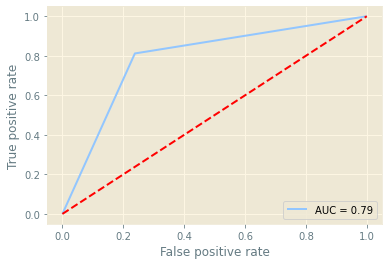

In [120]:
#Random Forest
rf = RandomForestClassifier()
model_run(rf,X,Y)

#6.25

max accuracy score corresponding to 98 is 81.65680473372781


cross validation score 74.64778810932657


Standard Deviation 4.036435550795892


F1 score 78.21229050279331


Training accuracy 81.92592592592592


Test Accuracy 76.92307692307693


Confusion Matrix [[60 24]
 [15 70]]


Classification Report               precision    recall  f1-score   support

           0       0.80      0.71      0.75        84
           1       0.74      0.82      0.78        85

    accuracy                           0.77       169
   macro avg       0.77      0.77      0.77       169
weighted avg       0.77      0.77      0.77       169



Roc_auc Score 0.7689075630252101





98

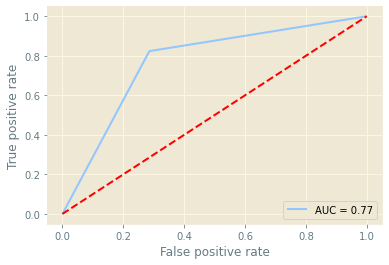

In [121]:
#AdaBoost
adb = AdaBoostClassifier()
model_run(adb,X,Y)

#7.01

max accuracy score corresponding to 83 is 83.4319526627219


cross validation score 77.49788672865596


Standard Deviation 7.104351141757141


F1 score 80.64516129032258


Training accuracy 91.11111111111111


Test Accuracy 78.69822485207101


Confusion Matrix [[58 26]
 [10 75]]


Classification Report               precision    recall  f1-score   support

           0       0.85      0.69      0.76        84
           1       0.74      0.88      0.81        85

    accuracy                           0.79       169
   macro avg       0.80      0.79      0.78       169
weighted avg       0.80      0.79      0.78       169



Roc_auc Score 0.7864145658263306





83

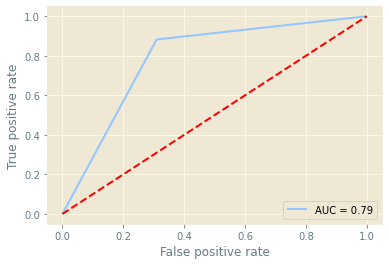

In [122]:
#Gradient Boost
gb = GradientBoostingClassifier()
model_run(gb,X,Y)

#5.94

# It is clear that Naive Bayes is Most generalised model among all because the difference between Accuracy Score and cross validation score is miminum as compared to other models. So this would be our best model giving 76.33% accuracy.